# Setup

In [1]:
!pip install loadmydata

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for loadmydata: filename=loadmydata-0.0.11-py3-none-any.whl size=18149 sha256=5c2928698df1285d5843243cf571fd36e1c08d2009a570e4d6e707481a49f7dc
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\ad\f5\cd\bf6e6f7784acfe47e7ca10473ccafee9b61c1dace2cf5192fe
Successfully built loadmydata


**Imports**

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from loadmydata.load_human_locomotion import (
    load_human_locomotion_dataset,
    get_code_list,
)
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import roc_curve, auc


**Utility functions**

In [4]:
def fig_ax(figsize=(15, 5)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.autoscale(enable=True, axis='x', tight=True)
    return fig, ax

# Spectral feature

## Question 6

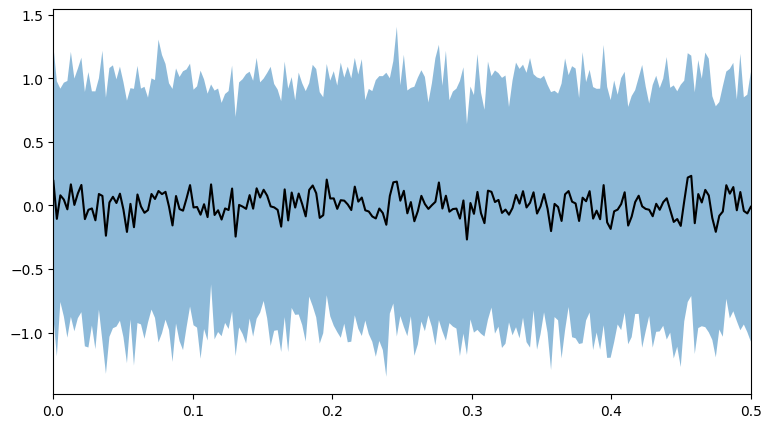

In [3]:
# This is an example of plot (random data). You can change it if you want.

## Change the following lines
periodograms = np.random.randn(100, 200)  # shape (n_trials, n_freqs)
freqs = np.linspace(0, 0.5, 200)
##


fig, ax = fig_ax(figsize=(9, 5))

avg = periodograms.mean(axis=0)
std = periodograms.std(axis=0)
ax.plot(freqs, avg, 'k-')
ax.fill_between(freqs, avg-std, avg+std, alpha=0.5)


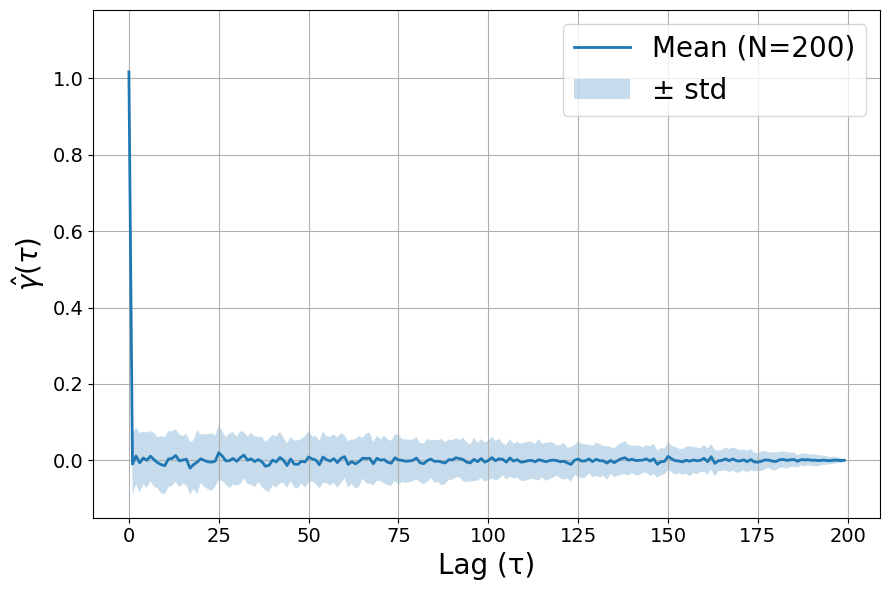

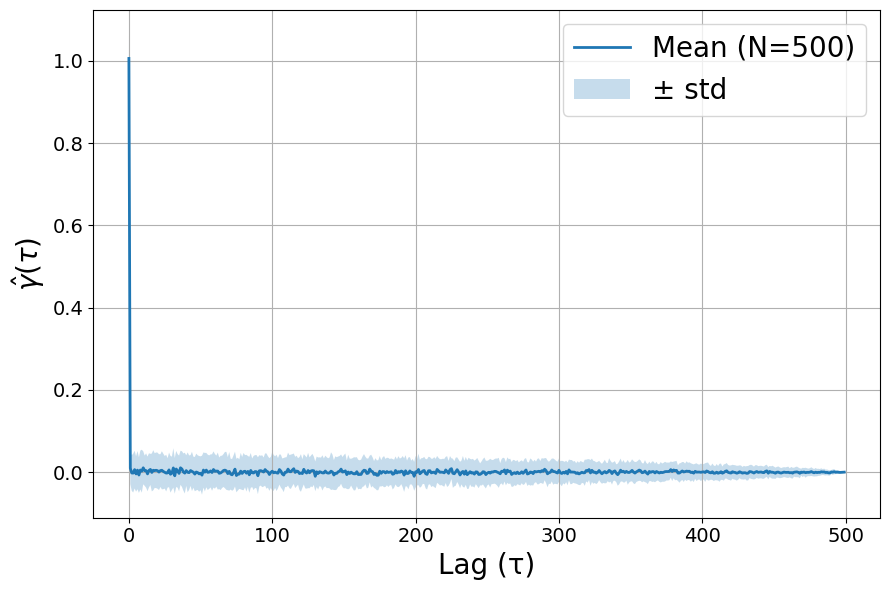

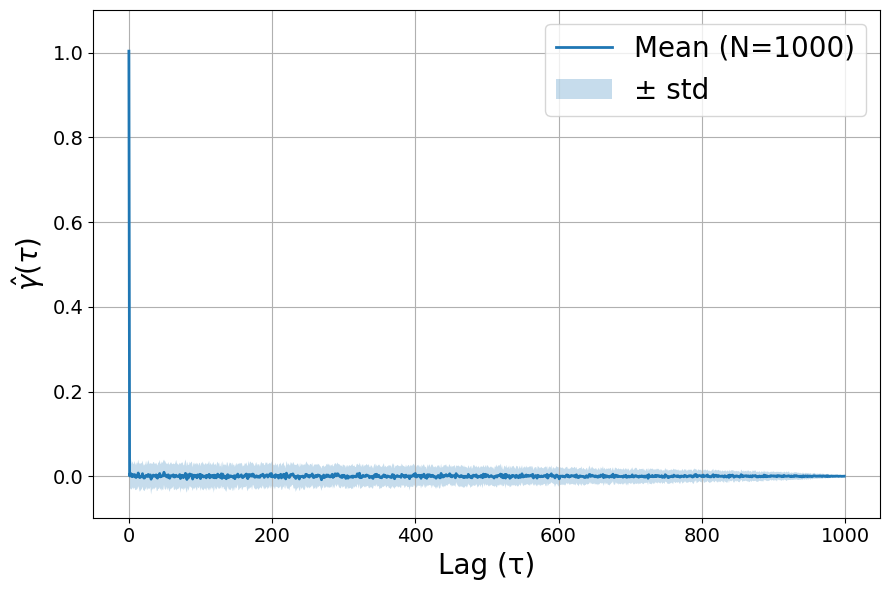

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres
list_N = [200, 500, 1000]
sigma2 = 1
num_simulations = 100

for N in list_N:
    autocovariances = np.zeros((num_simulations, N))
    
    for k in range(num_simulations):
        X = np.random.randn(N) * np.sqrt(sigma2)
        # course definition : (1/N) sum X_n X_{n+tau}
        gamma_hat = np.correlate(X, X, mode='full') / N #list of autocorrelations for 2N - 1 lags [autocorr lag -(N-1),autocorr lag -(N-2),..., autocorr lag N-N=0, autocorr lag 1,..., autocorr lag (N-1)]
        gamma_hat = gamma_hat[N-1:]        # lags >= 0  
        autocovariances[k, :] = gamma_hat # array of list of autocorrelation. final size = 100 lines, N columns

    mean_autocov = np.mean(autocovariances, axis=0)
    std_autocov = np.std(autocovariances, axis=0)
    lags = np.arange(N)


    fig, ax = plt.subplots(figsize=(9, 6))

    ax.plot(lags, mean_autocov, label=f'Mean (N={N})', linewidth=2)
    ax.fill_between(lags, mean_autocov - std_autocov, mean_autocov + std_autocov, alpha=0.25, label='± std')
    
    # ax.set_title(f'Sample autocovariance, N={N}')
    
    # ax.set_xlabel('Lag (τ)')
    # ax.set_ylabel(r'$\hat{\gamma}(\tau)$')

    ax.set_xlabel('Lag (τ)', fontsize=20)
    ax.set_ylabel(r'$\hat{\gamma}(\tau)$', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=14)

    ax.grid(True)
    ax.legend(fontsize=20)
    plt.tight_layout()
    plt.show()


Mean value of the variance for N=200: 3.9773190178286497


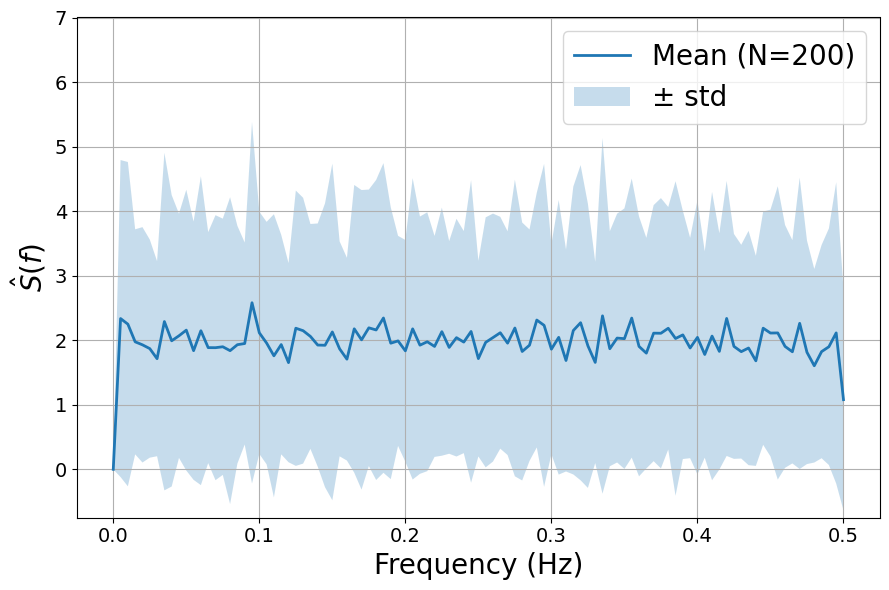

Mean value of the variance for N=500: 3.9207176002000317


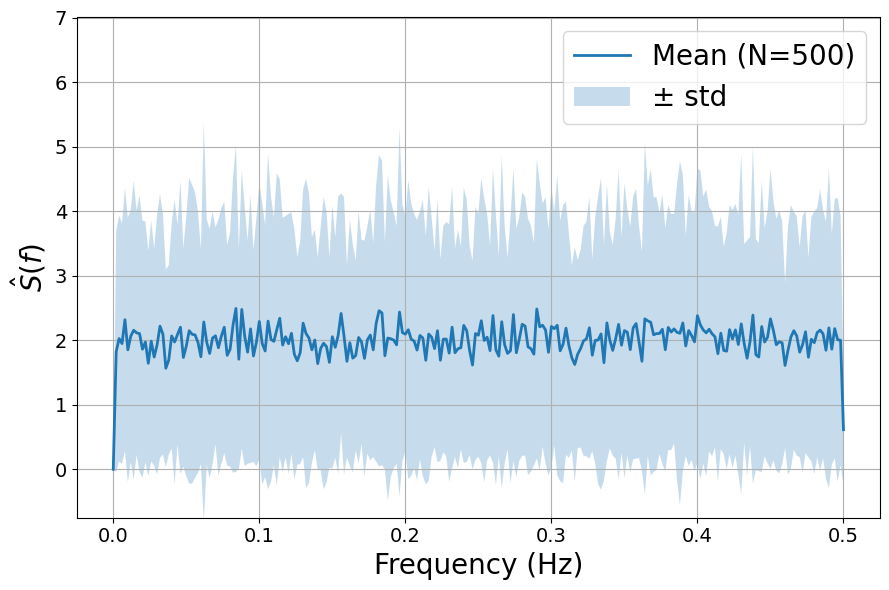

Mean value of the variance for N=1000: 3.8685029837726916


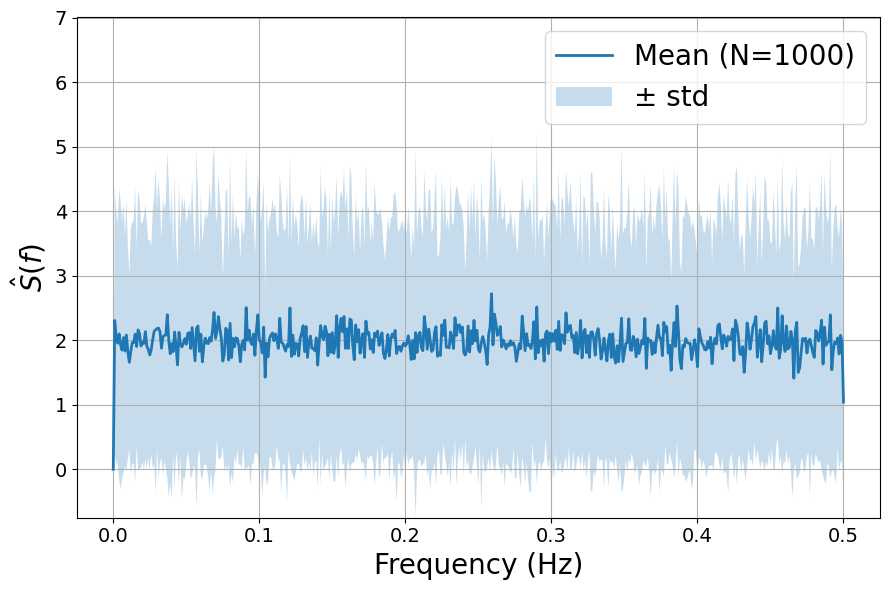

In [45]:
list_N = [200, 500, 1000]
sigma2 = 1
FREQUENCY = 1  # fs = 1 Hz
num_simulations = 100

for N in list_N:
    freqs_template = np.fft.rfftfreq(N, d=1/FREQUENCY)
    num_freqs = freqs_template.shape[0]
    periodograms = np.zeros((num_simulations, num_freqs))
    
    for k in range(num_simulations):
        X = np.random.randn(N) * np.sqrt(sigma2) # gaussian white noise
        freqs, P_f = signal.welch(
            X,
            fs=FREQUENCY,
            window='boxcar',
            nperseg=N,
            scaling='density'
        )
        
        if P_f.shape[0] == num_freqs:
            periodograms[k, :] = P_f
        elif P_f.shape[0] == num_freqs - 1:
            periodograms[k, :-1] = P_f
            

    mean_periodogram = np.mean(periodograms, axis=0)
    std_periodogram = np.std(periodograms, axis=0)
    
    mean_variance = np.mean(std_periodogram**2)
    print(f"Mean value of the variance for N={N}:", mean_variance) 

    fig, ax = plt.subplots(figsize=(9, 6))
    ax.plot(freqs, mean_periodogram, label=f'Mean (N={N})', linewidth=2)
    ax.fill_between(freqs,
                    mean_periodogram - std_periodogram,
                    mean_periodogram + std_periodogram,
                    alpha=0.25, label='± std')

    # ax.set_title(f'Average Periodogram (100 simulations) – N={N}')
    ax.set_xlabel('Frequency (Hz)', fontsize=20)
    
    ax.set_ylim(-0.75, 7) 
    ax.set_ylabel(r'$\hat{S}(f)$', fontsize=20) 
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.grid(True)
    ax.legend(fontsize=20)
    plt.tight_layout()
    plt.show()

## Question 9

mean value of the std for N=200: 0.800897924266757


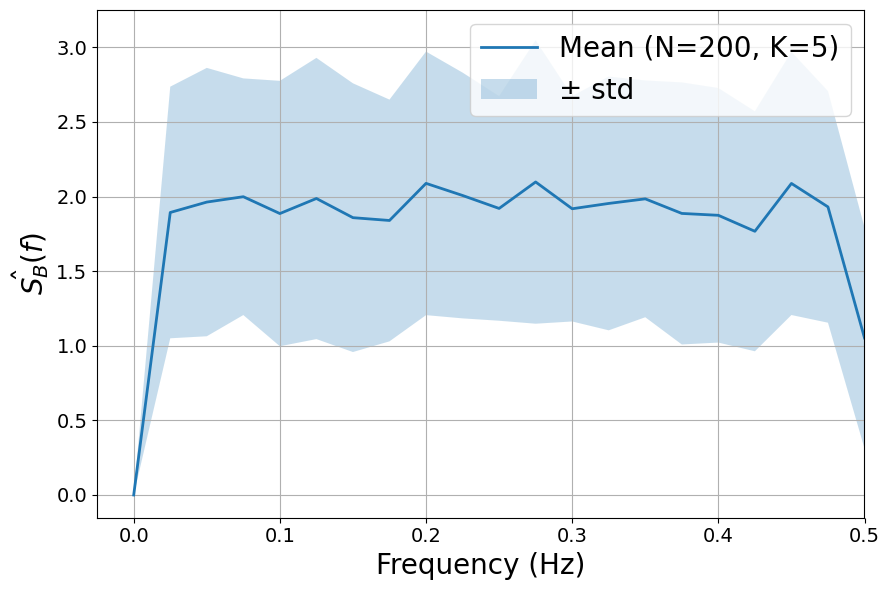

mean value of the std for N=500: 0.8682676805483556


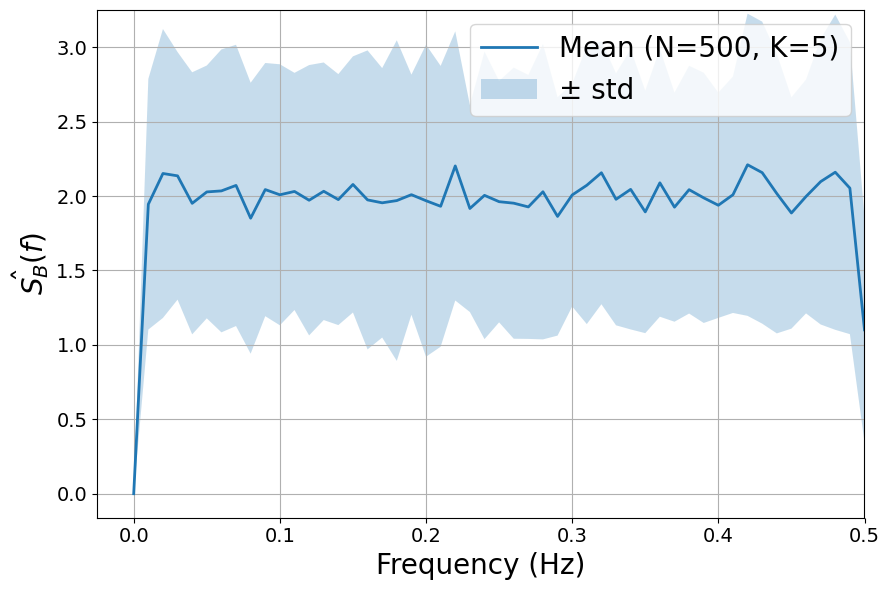

mean value of the std for N=1000: 0.874457724325208


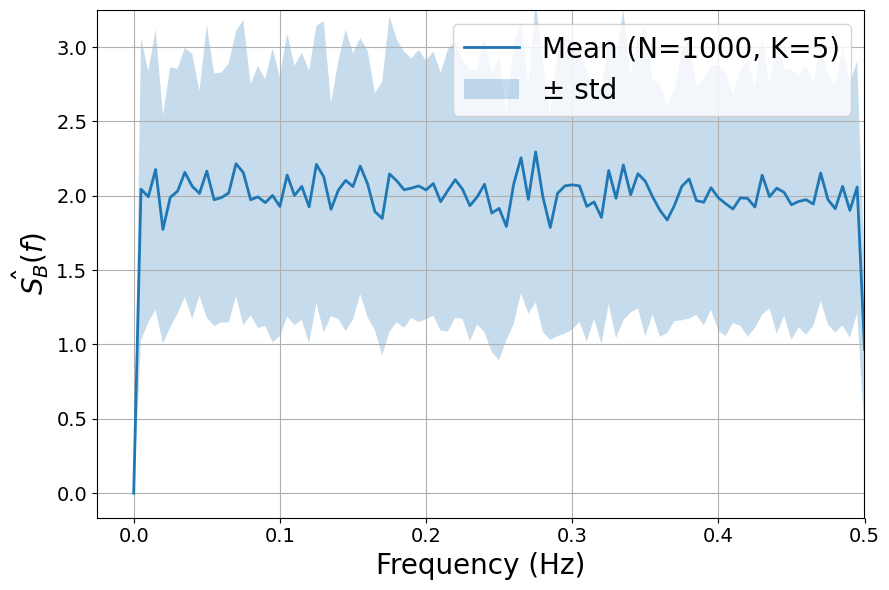

In [41]:
from scipy import signal

list_N = [200, 500, 1000]
sigma2 = 1
FREQUENCY = 1  # fs = 1 Hz
num_simulations = 100
K = 5  # number of sections for Bartlett

for N in list_N:
    M = N // K  # the length of each section
    num_freqs = M // 2 + 1 # the number of frequencies will be M//2 + 1
    
    bartlett_estimates = np.zeros((num_simulations, num_freqs))
    
    for i in range(num_simulations):
        X = np.random.randn(N) * np.sqrt(sigma2)
        freqs, P_bartlett = signal.welch(
            X,
            fs=FREQUENCY,
            window='boxcar', #rectangular window
            nperseg=M, # the section length
            noverlap=0,
            scaling='density' # This estimates the Power Spectral Density (PSD)
        )
        bartlett_estimates[i, :] = P_bartlett

    mean_periodogram = np.mean(bartlett_estimates, axis=0)
    std_periodogram = np.std(bartlett_estimates, axis=0)
    print(f"mean value of the std for N={N}:", np.mean(std_periodogram)) 
    
    fig, ax = plt.subplots(figsize=(9, 6))
    ax.plot(freqs, mean_periodogram, label=f'Mean (N={N}, K=5)', linewidth=2)
    ax.fill_between(freqs,
                    mean_periodogram - std_periodogram,
                    mean_periodogram + std_periodogram,
                    alpha=0.25, label='± std')
    

    # ax.set_title(f'Average Bartlett Periodogram (100 simulations) – N={N}')
    ax.set_xlabel('Frequency (Hz)', fontsize=20)
    ax.set_ylim(top = 3.25)  # Set ylim for consistent comparison
    ax.set_xlim(right = 0.5) # Set xlim for consistent comparison
    ax.set_ylabel(r'$\hat{S_{B}}(f)$', fontsize=20)  # Y-label for Bartlett PSD
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.grid(True)
    ax.legend(fontsize=20)
    plt.tight_layout()
    plt.show()

We notice that the mean std in this Barlett periodogram is k times less than the mean std in the previous periodogram

# Dynamic time warping (DTW)

## Data

This data set consists of signals collected with inertial measurement units (accelerometer+gyroscope), from 230 subjects undergoing a fixed protocol:
- standing still,
- walking 10 m,
- turning around,
- walking back,
- stopping.

In this assignment, we only consider the vertical acceleration of the left foot and all signals are truncated to 20 seconds (as a result, they all have same length). Signals are sampled at 100 Hz.

The measured population is composed of healthy subjects as well as patients with neurological or orthopedic disorders.

The start and end time stamps of thousands of footsteps are available.

The data are part of a larger data set described in [1].

[1] Truong, C., Barrois-Müller, R., Moreau, T., Provost, C., Vienne-Jumeau, A., Moreau, A., Vidal, P.-P., Vayatis, N., Buffat, S., Yelnik, A., Ricard, D., & Oudre, L. (2019). A data set for the study of human locomotion with inertial measurements units. Image Processing On Line (IPOL), 9.

**The task** is to classify footsteps in healthy/non-healthy.

The following cell defines the training set `(X_train, y_train)` and testing set `(X_test, y_test)`.

In [5]:
subset_indexes_train = [95, 619, 441, 149, 951, 803, 214, 34, 37, 630]
subset_indexes_test = [683, 259, 59, 387, 634]

code_list = get_code_list()

X_train = list()  # list of footstep signals
y_train = list()  # list of pathologies (the "labels")

for code in np.take(code_list, subset_indexes_train):
    single_trial = load_human_locomotion_dataset(code)
    signal = single_trial.signal.LAZ.to_numpy()  # keeping only one dimension (from the left sensor)
    steps = single_trial.left_steps
    pathology = single_trial.metadata["PathologyGroup"]
    label = 0 if pathology=="Healthy" else 1  # 0: healthy, 1: non-healthy
    for (start, end) in steps:
        X_train.append(signal[start:end])
        y_train.append(label)

        
X_test = list()  # list of footstep signals
y_test = list()  # list of pathologies (the "labels")

for code in np.take(code_list, subset_indexes_test):
    single_trial = load_human_locomotion_dataset(code)
    signal = single_trial.signal.LAZ.to_numpy()  # keeping only one dimension (from the left sensor)
    steps = single_trial.left_steps
    pathology = single_trial.metadata["PathologyGroup"]
    label = 0 if pathology=="Healthy" else 1  # 0: healthy, 1: non-healthy
    for (start, end) in steps:
        X_test.append(signal[start:end])
        y_test.append(label)

## Question 10

In [6]:
from tslearn.utils import to_time_series_dataset
from tslearn.neighbors import KNeighborsTimeSeriesClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

X_train = to_time_series_dataset(X_train)
X_test = to_time_series_dataset(X_test)


pipeline = pipe = Pipeline([
    ("knn", KNeighborsTimeSeriesClassifier(metric="dtw", n_jobs=-1))
])

param_grid = {
    "knn__n_neighbors": range(1, 50)
}

grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring="f1",
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('knn',
                                        KNeighborsTimeSeriesClassifier(n_jobs=-1))]),
             n_jobs=-1, param_grid={'knn__n_neighbors': range(1, 50)},
             scoring='f1', verbose=1)

In [7]:
print(f"La meilleure valeur de K est : {grid_search.best_params_['knn__n_neighbors']}")
print(f"Le F1 score pour un K de 5 est  :{grid_search.best_score_}")

La meilleure valeur de K est : 5
Le F1 score pour un K de 5 est  :0.781814185073362


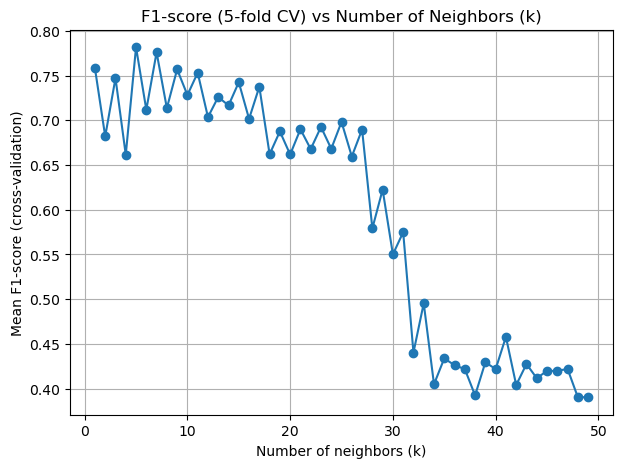

In [9]:
results = pd.DataFrame(grid_search.cv_results_)

k_values = results["param_knn__n_neighbors"].astype(int)
f1_scores = results["mean_test_score"]

sorted_idx = np.argsort(k_values)
k_values = k_values.iloc[sorted_idx]
f1_scores = f1_scores.iloc[sorted_idx]

plt.figure(figsize=(7, 5))
plt.plot(k_values, f1_scores, marker='o', linestyle='-')
plt.title("F1-score (5-fold CV) vs Number of Neighbors (k)")
plt.xlabel("Number of neighbors (k)")
plt.ylabel("Mean F1-score (cross-validation)")
plt.grid(True)
plt.show()


In [12]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

test_f1 = f1_score(y_test, y_pred)

print(f"Test set : F1 score: {test_f1:.3f}")

print(classification_report(y_test, y_pred, target_names=["Healthy", "Non-Healthy"]))

Test set : F1 score: 0.513
              precision    recall  f1-score   support

     Healthy       0.08      0.27      0.13        15
 Non-Healthy       0.72      0.40      0.51        73

    accuracy                           0.38        88
   macro avg       0.40      0.33      0.32        88
weighted avg       0.62      0.38      0.45        88



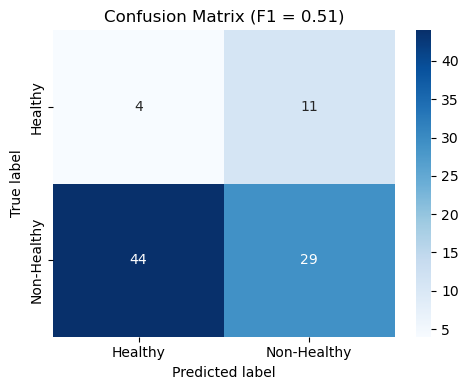

In [13]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Healthy", "Non-Healthy"],
            yticklabels=["Healthy", "Non-Healthy"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title(f"Confusion Matrix (F1 = {test_f1:.2f})")
plt.tight_layout()
plt.show()

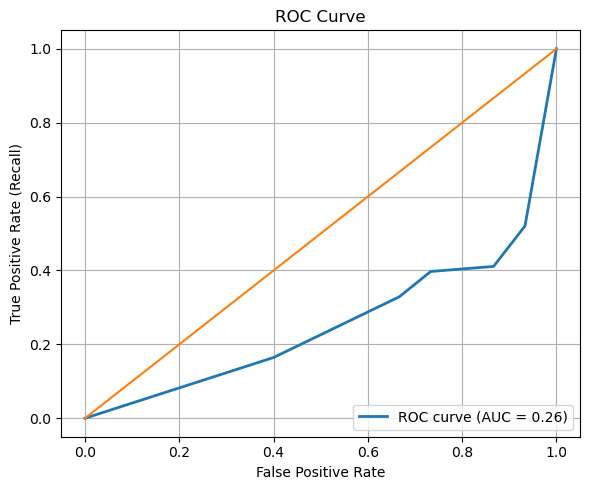

In [15]:
y_scores = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, lw=2,
         label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

## Question 11

Text(0, 0.5, 'Value')

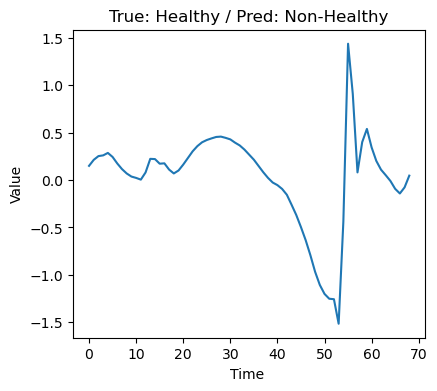

In [16]:
misclassified_idx = [i for i, (true, pred) in enumerate(zip(y_test, y_pred)) if true != pred]
idx_bad_healthy = next(i for i in misclassified_idx if y_test[i] == 0)
idx_bad_nonhealthy = next(i for i in misclassified_idx if y_test[i] == 1)
bad_healthy = X_test[idx_bad_healthy].ravel()
bad_nonhealthy = X_test[idx_bad_nonhealthy].ravel()

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(bad_healthy, color="tab:blue")
plt.title("True: Healthy / Pred: Non-Healthy")
plt.xlabel("Time ")
plt.ylabel("Value")

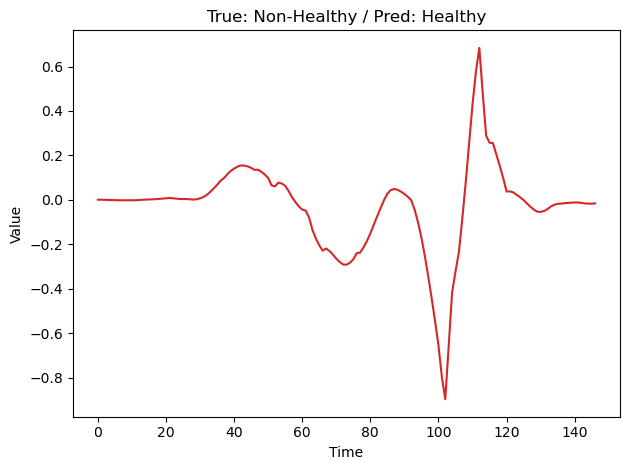

In [18]:
plt.plot(bad_nonhealthy, color="tab:red")
plt.title("True: Non-Healthy / Pred: Healthy")
plt.xlabel("Time")
plt.ylabel("Value")


plt.tight_layout()
plt.show()